In [49]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']= (12, 8)

pd.options.mode.chained_assignment = None

df = pd.read_csv("movies.csv")

In [114]:
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,1980


In [51]:
# check if there are any missed data by loop through the columns

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(pct_missing * 100)}%')

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [52]:
# data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [53]:
df['budget'] = (
    df['budget']
    .fillna(0)
    .astype('int64')
)

In [54]:
df['yearcorrected'] = (
    df['released']
    .str.split('(')
    .str[0]
    .str[-5:]
    .str.strip()
    .fillna(df.year)  # fill nan with year column
    .astype('int64')
)

In [113]:
pd.set_option('display.max_rows', 20)
df.sort_values(by=['gross'], ascending=False).head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181.0,2019


In [64]:
df.corr()

,year,score,votes,budget,gross,runtime,yearcorrected
year,1.000000,0.097995,0.222945,0.309212,0.257486,0.120811,0.997416
score,0.097995,1.000000,0.409182,0.055665,0.186258,0.399451,0.105821
votes,0.222945,0.409182,1.000000,0.486862,0.630757,0.309212,0.218422
budget,0.309212,0.055665,0.486862,1.000000,0.748719,0.269510,0.299876
gross,0.257486,0.186258,0.630757,0.748719,1.000000,0.245216,0.250514
runtime,0.120811,0.399451,0.309212,0.269510,0.245216,1.000000,0.120636
yearcorrected,0.997416,0.105821,0.218422,0.299876,0.250514,0.120636,1.000000


Text(0.5, 1.0, 'Movies Buget vs Gross')

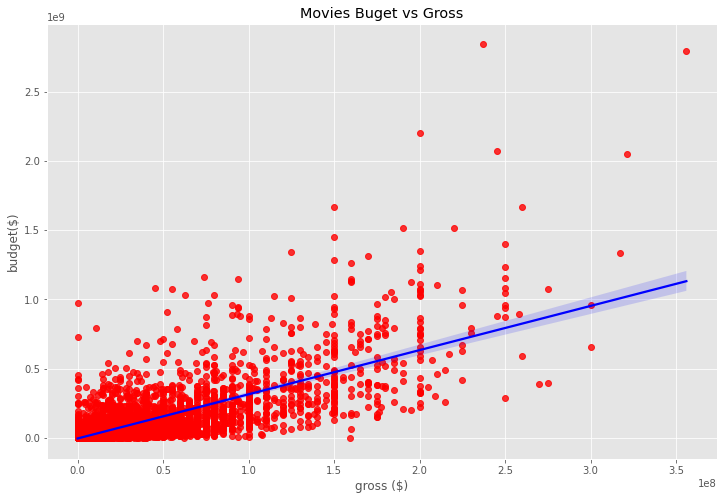

In [84]:
# scatter plot with budget vs gross revenue
fig, ax = plt.subplots()
sns.regplot(x='budget', y='gross', 
    ax=ax, data=df,  
    scatter_kws={'color': 'red'},
    line_kws={'color': 'blue'}
    );
ax.set_ylabel('budget($)')
ax.set_xlabel('gross ($)')
ax.set_title("Movies Buget vs Gross")

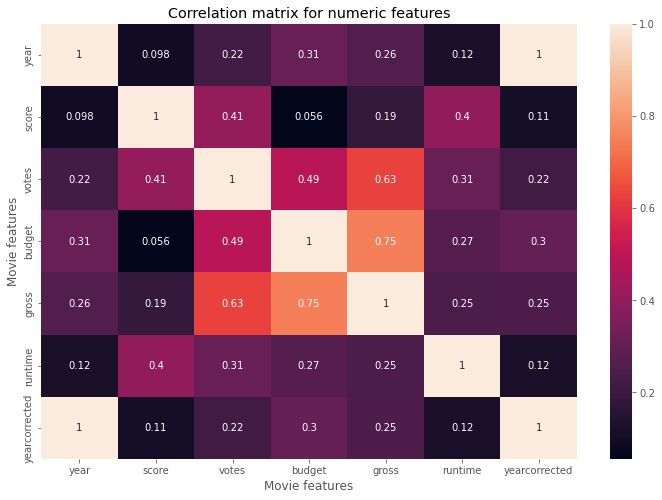

In [81]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [96]:
# convert string/object columns to category
df_numerized = df.copy()

for col in df_numerized.columns:
    if df_numerized[col].dtype == 'object':
        df_numerized[col] = (
            df_numerized[col]
            .astype('category')
            .cat.codes
        )
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772.0,2319,146.0,1980
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106.0,731,104.0,1980
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067.0,1540,124.0,1980
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539.0,1812,88.0,1980
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344.0,1777,98.0,1980


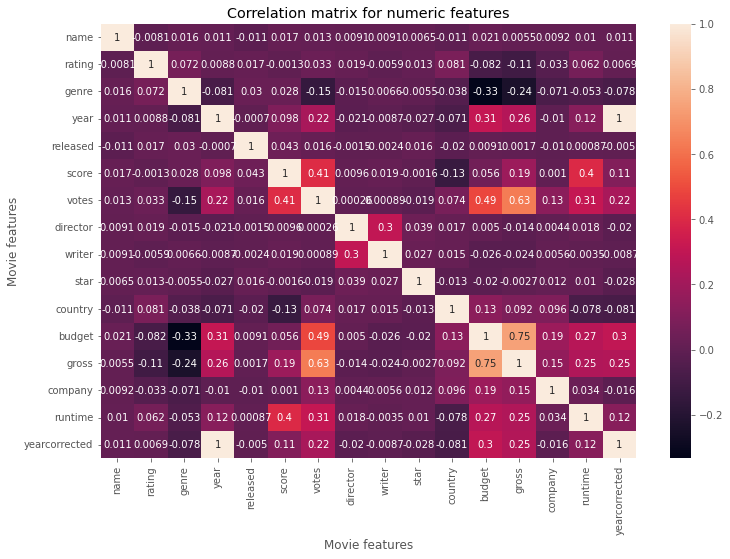

In [102]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [104]:
# factorize correlation matrix
correlation_factorize = df_numerized.corr()
corr_pairs = correlation_factorize.unstack()
corr_pairs

name           name             1.000000
               rating          -0.008069
               genre            0.016355
               year             0.011453
               released        -0.011311
                                  ...   
yearcorrected  budget           0.299876
               gross            0.250514
               company         -0.015600
               runtime          0.120636
               yearcorrected    1.000000
Length: 256, dtype: float64

In [111]:
corr_pairs[corr_pairs > 0.5].sort_values()

gross          votes            0.630757
votes          gross            0.630757
gross          budget           0.748719
budget         gross            0.748719
year           yearcorrected    0.997416
                                  ...   
               year             1.000000
genre          genre            1.000000
rating         rating           1.000000
star           star             1.000000
yearcorrected  yearcorrected    1.000000
Length: 22, dtype: float64